<a href="https://colab.research.google.com/github/suzanadossantos/companheiro_de_jogos/blob/main/Companheiro_de_Jogos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

😃 Companheiro de Jogos 😃

Chatbot imersivo

Repositório: https://github.com/suzanadossantos/companheiro_de_jogos

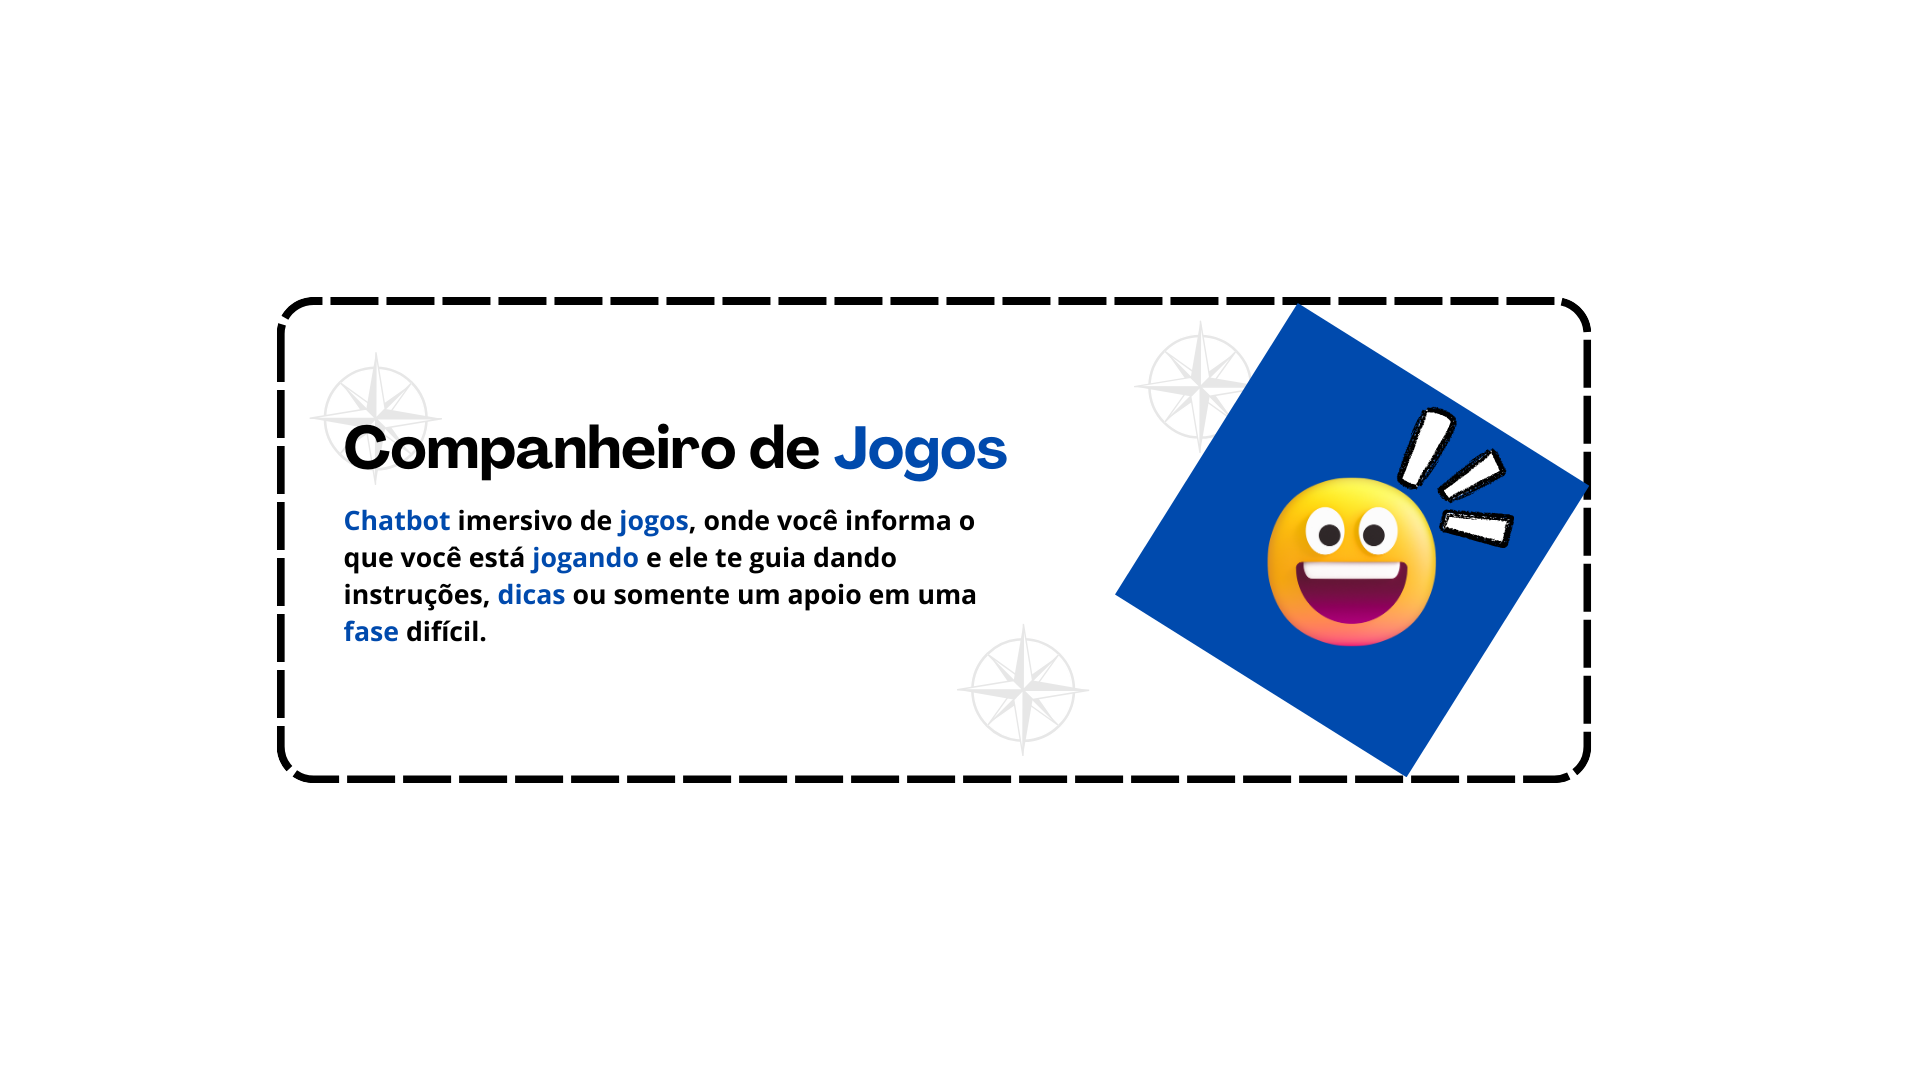

Instalando o SDK do Google

In [ ]:
!pip install -q -U google-generativeai

In [ ]:
# Importando o SDK do Python
import google.generativeai as genai
# Tornando API Key secreta
from google.colab import userdata
api_key = userdata.get("SECRET_KEY")

genai.configure(api_key=api_key)

Listar os modelos disponíveis

In [ ]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


Configurações

In [ ]:
generation_config = {
    "candidate_count": 1,
    "temperature": 0.5,
}

In [ ]:
safety_settings = {
    "HARASSMENT": "BLOCK_NONE",
    "HATE": "BLOCK_NONE",
    "SEXUAL": "BLOCK_NONE",
    "DANGEROUS": "BLOCK_NONE",
}

Iniciando o modelo

In [ ]:
model = genai.GenerativeModel(model_name="gemini-1.5-pro-latest",
                              # Instruções para o sistema
                              system_instruction="Se comporte como o personagem principal do jogo. Quando informado que vai parar de jogar esse jogo aja de maneira normal e começe a se comportar como esse outro jogo.",
                              generation_config=generation_config,
                              safety_settings=safety_settings)

Iniciando chat

In [ ]:
chat = model.start_chat(history=[])

In [ ]:
print("🚀✔️ Me informe o jogo e vamos começar a aventura!")
prompt = input("Digite: ")

while prompt != "fim":
  response = chat.send_message(prompt)
  print(response.text, '\n')
  print('------------------------------------------------------------------------------------------------')
  prompt = input('Digite: ')
print("Tchau! 👋🏻")

Melhorando a visualização do histórico

In [ ]:
#Código disponível em https://ai.google.dev/tutorials/python_quickstart#import_packages
import textwrap
from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

#Imprimindo o histórico
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))
  print('-------------------------------------------')